## Image recognition using CNNs

#### Training
Design and train a CNN to deal with the classification task.

In [ ]:
import cv2
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

(x_train, y_train), (x_valid, y_valid) = tf.keras.datasets.cifar10.load_data()
x_train, x_valid = x_train / 255.0, x_valid / 255.0

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
# Load architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

print('Load model')
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))


model.summary()

Load model
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_48 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_29 (Dropout)        (None, 8, 8, 

In [ ]:
from keras.optimizers import Adam

# Learning rate is changed to 0.001
opt = Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-8, weight_decay=0.00, amsgrad=True, clipnorm=1.0, clipvalue=0.5)
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
from keras.callbacks import TerminateOnNaN, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Callbacks
model_checkpoint = ModelCheckpoint('model.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau('val_accuracy', factor=0.1, patience=10, verbose=1)
early_stop = EarlyStopping('val_accuracy', patience=40, verbose=1)
terminate = TerminateOnNaN()
callbacks = [model_checkpoint, reduce_lr, early_stop, terminate]

In [ ]:
history = model.fit(x_train, y_train, epochs=15, callbacks=callbacks, batch_size = 128,
                    validation_data=(x_valid, y_valid))



Epoch 1/15
391/391 [==============================] - ETA: 0s - loss: 1.6279 - accuracy: 0.4062
Epoch 1: val_accuracy improved from -inf to 0.50180, saving model to model.hdf5
391/391 [==============================] - 8s 13ms/step - loss: 1.6279 - accuracy: 0.4062 - val_loss: 1.3979 - val_accuracy: 0.5018 - lr: 0.0010
Epoch 2/15
388/391 [============================>.] - ETA: 0s - loss: 1.2476 - accuracy: 0.5553
Epoch 2: val_accuracy improved from 0.50180 to 0.60110, saving model to model.hdf5
391/391 [==============================] - 4s 9ms/step - loss: 1.2462 - accuracy: 0.5558 - val_loss: 1.1061 - val_accuracy: 0.6011 - lr: 0.0010
Epoch 3/15
388/391 [============================>.] - ETA: 0s - loss: 1.0741 - accuracy: 0.6216
Epoch 3: val_accuracy improved from 0.60110 to 0.66000, saving model to model.hdf5
391/391 [==============================] - 3s 9ms/step - loss: 1.0738 - accuracy: 0.6217 - val_loss: 0.9630 - val_accuracy: 0.6600 - lr: 0.0010
Epoch 4/15
390/391 [=============

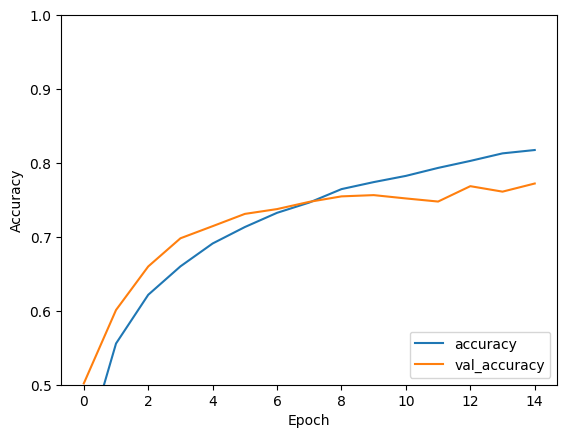

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


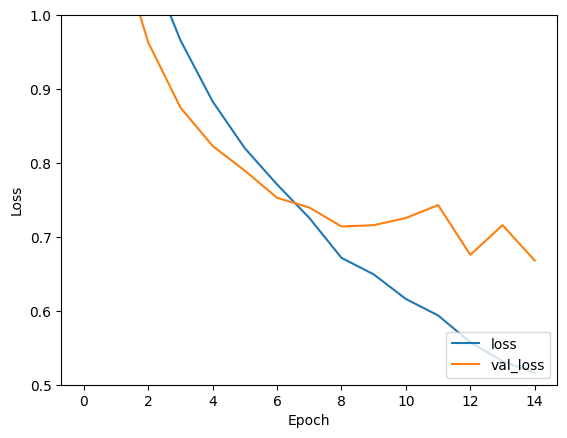

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model.evaluate(x_valid,  y_valid, verbose=2)

313/313 - 1s - loss: 0.6680 - accuracy: 0.7722 - 763ms/epoch - 2ms/step


#### Validation results


In [ ]:
import numpy as np

# model.load_weights('model.hdf5', by_name=True)
y_true, y_pred = [], []
for idx in range(len(y_valid)):
  # Generate prediction
  img = cv2.resize(x_valid[idx], dsize=(32, 32))
  img = np.expand_dims(img, axis=0)
  predictions = model.predict(img)
  # Save prediction
  pred_category = np.argmax(predictions)
  pred_score = np.max(predictions)
  y_true.append(y_valid[idx])
  y_pred.append(pred_category)
  print(y_valid[idx], pred_category)

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 18ms/step
[6] 6
1/1 [==============================] - 0s 18ms/step
[9] 9
1/1 [==============================] - 0s 24ms/step
[8] 1
1/1 [==============================] - 0s 17ms/step
[8] 8
1/1 [==============================] - 0s 19ms/step
[6] 3
1/1 [==============================] - 0s 17ms/step
[7] 7
1/1 [==============================] - 0s 18ms/step
[4] 4
1/1 [==============================] - 0s 20ms/step
[7] 5
1/1 [==============================] - 0s 20ms/step
[2] 2
1/1 [==============================] - 0s 18ms/step
[3] 1
1/1 [==============================] - 0s 17ms/step
[8] 8
1/1 [==============================] - 0s 17ms/step
[0] 0
1/1 [==============================] - 0s 18ms/step
[9] 9
1/1 [==============================] - 0s 18ms/step
[0] 9
1/1 [==============================] - 0s 29ms/step
[7] 7
1/1 [==============================] - 0s 18ms/step
[8] 8
1/1 [======

<ipython-input-99-ef52c083f6a9>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.get_cmap('Blues'))


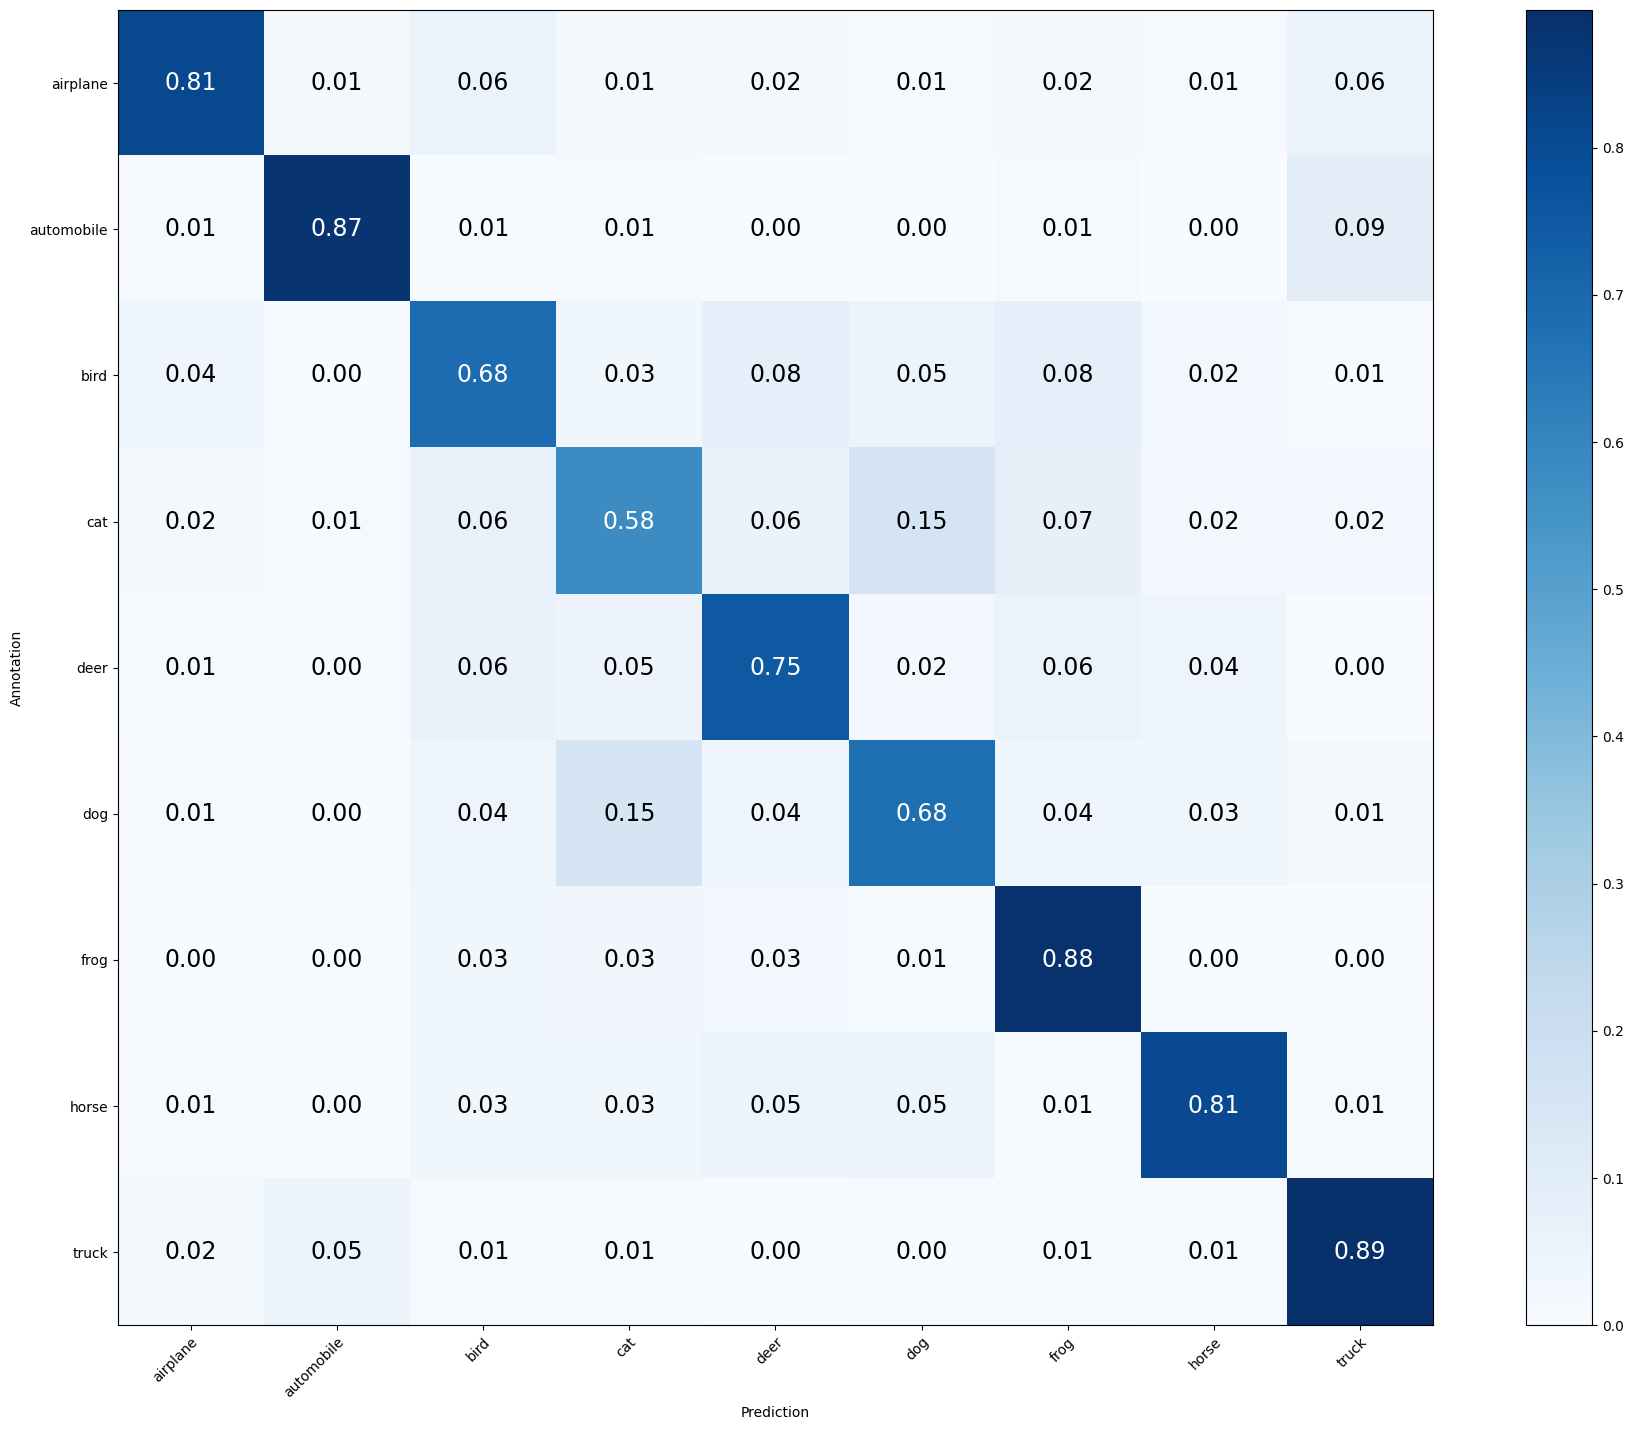

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def draw_confusion_matrix(cm, categories):
    # Draw confusion matrix
    fig = plt.figure(figsize=[6.4*pow(len(categories), 0.5), 4.8*pow(len(categories), 0.5)])
    ax = fig.add_subplot(111)
    cm = cm.astype('float') / np.maximum(cm.sum(axis=1)[:, np.newaxis], np.finfo(np.float64).eps)
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.get_cmap('Blues'))
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), xticklabels=list(categories.values()), yticklabels=list(categories.values()), ylabel='Annotation', xlabel='Prediction')
    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    # Loop over data dimensions and create text annotations
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], '.2f'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black", fontsize=int(20-pow(len(categories), 0.5)))
    fig.tight_layout()
    plt.show(fig)

# Compute the confusion matrix
categories = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 9: 'ship', 9: 'truck'}
cm = confusion_matrix(y_true, y_pred, labels=list(categories.keys()))
draw_confusion_matrix(cm, categories)

In [ ]:
import numpy as np

# Compute the accuracy
correct_samples_class = np.diag(cm).astype(float)
total_samples_class = np.sum(cm, axis=1).astype(float)
total_predicts_class = np.sum(cm, axis=0).astype(float)
print('Mean Accuracy: %.3f%%' % (np.sum(correct_samples_class) / np.sum(total_samples_class) * 100))
acc = correct_samples_class / np.maximum(total_samples_class, np.finfo(np.float64).eps)
print('Mean Recall: %.3f%%' % (acc.mean() * 100))
acc = correct_samples_class / np.maximum(total_predicts_class, np.finfo(np.float64).eps)
print('Mean Precision: %.3f%%' % (acc.mean() * 100))
for idx in range(len(categories)):
    # True/False Positives (TP/FP) refer to the number of predicted positives that were correct/incorrect.
    # True/False Negatives (TN/FN) refer to the number of predicted negatives that were correct/incorrect.
    tp = cm[idx, idx]
    fp = sum(cm[:, idx]) - tp
    fn = sum(cm[idx, :]) - tp
    tn = sum(np.delete(sum(cm) - cm[idx, :], idx))
    # True Positive Rate: proportion of real positive cases that were correctly predicted as positive.
    recall = tp / np.maximum(tp+fn, np.finfo(np.float64).eps)
    # Precision: proportion of predicted positive cases that were truly real positives.
    precision = tp / np.maximum(tp+fp, np.finfo(np.float64).eps)
    # True Negative Rate: proportion of real negative cases that were correctly predicted as negative.
    specificity = tn / np.maximum(tn+fp, np.finfo(np.float64).eps)
    # Dice coefficient refers to two times the intersection of two sets divided by the sum of their areas.
    # Dice = 2 |A∩B| / (|A|+|B|) = 2 TP / (2 TP + FP + FN)
    f1_score = 2 * ((precision * recall) / np.maximum(precision+recall, np.finfo(np.float64).eps))
    print('> %s: Recall: %.3f%% Precision: %.3f%% Specificity: %.3f%% Dice: %.3f%%' % (list(categories.values())[idx], recall*100, precision*100, specificity*100, f1_score*100))

Mean Accuracy: 77.271%
Mean Recall: 77.312%
Mean Precision: 77.356%
> airplane: Recall: 80.719% Precision: 87.279% Specificity: 98.637% Dice: 83.871%
> automobile: Recall: 87.462% Precision: 90.861% Specificity: 98.892% Dice: 89.129%
> bird: Recall: 68.453% Precision: 69.579% Specificity: 96.229% Dice: 69.011%
> cat: Recall: 57.836% Precision: 64.054% Specificity: 95.911% Dice: 60.786%
> deer: Recall: 75.101% Precision: 72.612% Specificity: 96.419% Dice: 73.835%
> dog: Recall: 67.839% Precision: 69.731% Specificity: 96.265% Dice: 68.772%
> frog: Recall: 88.454% Precision: 76.014% Specificity: 96.455% Dice: 81.763%
> horse: Recall: 80.603% Precision: 84.958% Specificity: 98.190% Dice: 82.723%
> truck: Recall: 89.344% Precision: 81.116% Specificity: 97.418% Dice: 85.032%


Las CNN son una opción más viable a la hora de realizar clasificación de imágenes, ya que a diferencia de las FFNN donde todas las neuronas de una capa están conectadas con todas las neuronas de la capa anterior, en las CNN las neuronas de una capa están conectadas a una región más pequeña de la capa anterior. Esto nos permite trabajar con datos de dimensiones elevadas y ser capaces de detectar tanto patrones simples (líneas, curvas, etc) como patrones complejos (caras, objetos, etc).
El objetivo de las CNN es aprovechar tres conceptos claves en la visión por computador: sparse interaction, parameter sharing, and equivariant representation.
A diferencia de las FFNN donde cada valor de salidas interactúa con cada cada valor de entrada (dense connected), las CNN son capaces de detectar información representativa en regiones más pequeñas de la imagen. Esto significa que necesitamos almacenar menos parámetros, lo que no solo reduce el requisito de memoria del modelo sino que también mejora la eficiencia estadística del modelo.

Por otro lado, en una FFNN, cada elemento de la matriz de pesos solo se usa una vez, mientras que la CNN tiene parámetros compartidos, es decir, para obtener resultados, los pesos aplicados a una entrada son los mismos que los aplicados en otros lugares.

Finalmente, gracias a esta compartición de parámetros, las capas de una CNN tendrán una propiedad de equivarianza con respecto a la traducción, lo cual significa que si cambiamos la entrada de alguna manera, la salida también cambiará de la misma manera.

En cuanto a la construcción de una arquitectura CNN, tres tipos de capas suelen estar presentes: convolutional layer, pooling layer, y una fully connected layer.

La convolutional layer realiza un producto escalar entre dos matrices, donde una matriz es el conjunto de parámetros que se pueden aprender, también conocido como kernel, y la otra matriz es la porción restringida del campo receptivo o receptive field.

Por otro lado, la pooling layer permite reducir el tamaño espacial de la representación, lo cual reduce el tiempo de cómputo y los pesos necesarios.

En particular, en este propuesta, se ha decidido por utilizar tres convolutional layers con sus respectivas pooling layers, así como añadiendo una regularización por Dropout. Finalmente, se utiliza una capa Flatten para convertir el resultado obtenido en una array 1D, el cual servirá como input de una capa densa de 128 neuronas, para finalizar con la capa output de 10 neuronas.

Se puede apreciar en los resultados, como haciendo má compleja la CNN añadiendo más convolutional layers con sus respectivas pooling layers, nos permite incrementar el rendimiento de nuestro modelo de un 49% de accuracy en el modelo base hasta un 77% de accuracy. En más detelle, se observa como el f1-score para todas las clases es superior al 60%, llegando incluso en varias de ellas a superar el 80% de f1-score.